In [1]:
import pandas as pd


In [155]:
#cleaning data and merging 
covid = pd.read_csv("COVID19-death-US.csv", parse_dates = ['date'])
overall = pd.read_csv('overall.csv', parse_dates = ['post_date'])
result = covid.merge(overall, how='left', left_on='date', right_on='post_date')
result2 = covid.merge(overall, left_on='date', right_on='post_date')

#reading in industry, geography and job_family
industry = pd.read_csv('industry.csv', parse_dates = ['post_date'])
jobfam = pd.read_csv('job_family.csv', parse_dates = ['post_date'])
geo = pd.read_csv('geography.csv', parse_dates = ['post_date'])

In [144]:
# web scrape state political affiliations
import urllib.request
from bs4 import BeautifulSoup

In [190]:
url = "https://en.wikipedia.org/wiki/Political_party_strength_in_U.S._states"

page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")
all_tables = soup.find_all("table")
right_table = soup.find_all('table', class_ = "sortable wikitable")

In [160]:
A = []
B = []
C = []
D = []
E = []
F = []
G = []
H = []
I = []

for row in right_table[0].findAll('tr'):
    cells = row.findAll('td')
    if len(cells) == 9:
        A.append(cells[0].find(text = True))
        B.append(cells[1].find(text = True))
        C.append(cells[2].find(text = True))
        D.append(cells[3].find(text = True))
        E.append(cells[4].find(text = True))
        F.append(cells[5].find(text = True))
        G.append(cells[6].find(text = True))
        H.append(cells[7].find(text = True))
        I.append(cells[8].find(text = True))
    elif len(cells) == 8:
        A.append(cells[0].find(text = True))
        B.append(cells[1].find(text = True))
        C.append(cells[2].find(text = True))
        D.append(cells[3].find(text = True))
        E.append(cells[3].find(text = True))
        F.append(cells[4].find(text = True))
        G.append(cells[5].find(text = True))
        H.append(cells[6].find(text = True))
        I.append(cells[7].find(text = True))

In [161]:
df = pd.DataFrame(A, columns = ['State'])
df['2020 presidential election'] = list(map(str.strip, B))
df['Governor'] = list(map(str.strip, C))
df['State Senate'] = list(map(str.strip, D))
df['State House'] = list(map(str.strip, E))
df['Senior U.S. Senator'] = list(map(str.strip, F))
df['Junior U.S. Senator'] = list(map(str.strip, G))
df['U.S. House of Reprsentatives'] = list(map(str.strip, H))
df['party registration'] = list(map(str.strip, I))

In [162]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

df['State Abbreviation'] = states

In [165]:
state_party = df[['State', 'State Abbreviation', 'Governor']]


In [ ]:
republican_states =


In [ ]:
democratic_states =

In [109]:
import seaborn as sns

<AxesSubplot:>

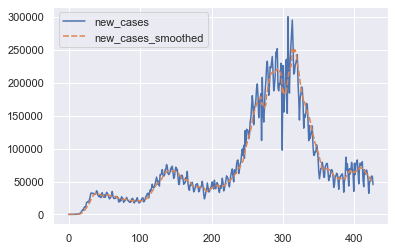

In [187]:
sns.lineplot(data=result2[['date', 'new_cases', 'new_cases_smoothed']])

<AxesSubplot:xlabel='date'>

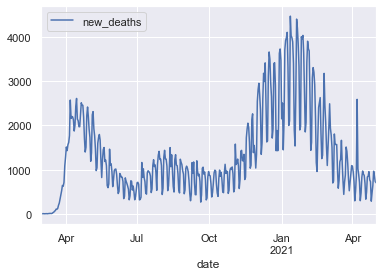

In [188]:
result2.plot.line(x='date', y='new_deaths')

<AxesSubplot:xlabel='date'>

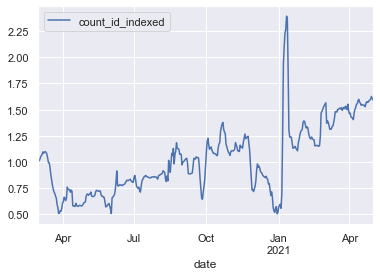

In [189]:
#overall hiring trend
result2.plot.line(x='date', y='count_id_indexed')

In [168]:
result2['date']

0     2020-03-01
1     2020-03-02
2     2020-03-03
3     2020-03-04
4     2020-03-05
         ...    
422   2021-04-27
423   2021-04-28
424   2021-04-29
425   2021-04-30
426   2021-05-01
Name: date, Length: 427, dtype: datetime64[ns]

/Users/minh-tampham/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-171-ad79872ffb42>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(0.0, 0, ''),
 Text(50.0, 0, '2020-04-19'),
 Text(100.0, 0, '2020-06-08'),
 Text(150.0, 0, '2020-07-28'),
 Text(200.0, 0, '2020-09-16'),
 Text(250.0, 0, '2020-11-05'),
 Text(300.0, 0, '2020-12-25'),
 Text(350.0, 0, '2021-02-13'),
 Text(400.0, 0, '2021-04-04'),
 Text(450.0, 0, '')]

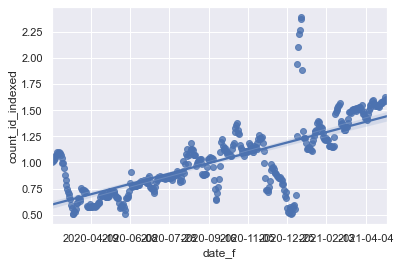

In [171]:
%matplotlib inline
temp = result2.sort_values('date')
temp['date_f'] = pd.factorize(temp['date'])[0] + 1
mapping = dict(zip(temp['date_f'], temp['date'].dt.date))

ax = sns.regplot('date_f', 'count_id_indexed', data=temp)
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)

We notice that there is an overall linearly positive trend, except for the drop in January. We see that this rapid drop happens during the week before December 25 and 1 week after New Years.

In [174]:
jobfam.head()

,post_date,job_family,count_id_indexed
0,2020-03-01,NaN,1.0
1,2020-03-01,Customer Service,1.0
2,2020-03-01,Entertainment and Recreation,1.0
3,2020-03-01,Facilities/Constr,1.0
4,2020-03-01,Finance/Insurance,1.0


In [72]:
%matplotlib tk
sns.lineplot(x='post_date', y='count_id_indexed', hue='job_family', data = jobfam)

<AxesSubplot:xlabel='post_date', ylabel='count_id_indexed'>

<AxesSubplot:xlabel='post_date', ylabel='count_id_indexed'>

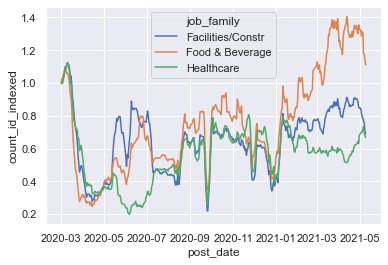

In [175]:
wanted_cat = ['Healthcare', 'Food & Beverage', 'Facilities/Constr']
subset = jobfam[jobfam['job_family'].isin(wanted_cat)]
sns.lineplot(x='post_date', y='count_id_indexed', hue='job_family', data = subset)

In [178]:
healthcare = jobfam[jobfam['job_family'] == 'Healthcare']
job_cases = result2.merge(healthcare, how='inner', left_on='date', right_on='post_date')

In [179]:
job_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,post_date_x,count_id_indexed_x,post_date_y,job_family,count_id_indexed_y
0,USA,North America,United States,2020-03-01,32,7.0,2.286,1.0,0.0,0.143,0.097,2020-03-01,1.0000,2020-03-01,Healthcare,1.0000
1,USA,North America,United States,2020-03-02,55,23.0,5.571,6.0,5.0,0.857,0.166,2020-03-02,1.0100,2020-03-02,Healthcare,0.9955
2,USA,North America,United States,2020-03-03,74,19.0,8.286,7.0,1.0,1.000,0.224,2020-03-03,1.0223,2020-03-03,Healthcare,0.9998
3,USA,North America,United States,2020-03-04,107,33.0,13.000,11.0,4.0,1.571,0.323,2020-03-04,1.0461,2020-03-04,Healthcare,1.0228
4,USA,North America,United States,2020-03-05,184,77.0,23.857,12.0,1.0,1.714,0.556,2020-03-05,1.0582,2020-03-05,Healthcare,1.0461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,USA,North America,United States,2021-04-27,32175725,50856.0,53784.000,573644.0,644.0,672.857,97206.851,2021-04-27,1.5909,2021-04-27,Healthcare,0.6304
423,USA,North America,United States,2021-04-28,32230850,55125.0,52679.429,574608.0,964.0,688.857,97373.390,2021-04-28,1.6003,2021-04-28,Healthcare,0.6431
424,USA,North America,United States,2021-04-29,32289049,58199.0,51385.429,575467.0,859.0,675.286,97549.217,2021-04-29,1.6255,2021-04-29,Healthcare,0.6307
425,USA,North America,United States,2021-04-30,32346971,57922.0,50745.857,576198.0,731.0,669.857,97724.206,2021-04-30,1.6088,2021-04-30,Healthcare,0.6834


/Users/minh-tampham/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_cases', ylabel='count_id_indexed_y'>

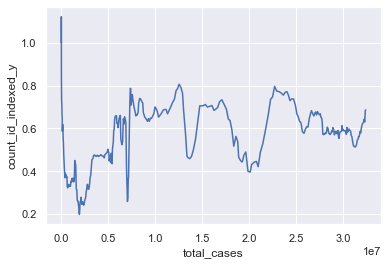

In [183]:
sns.lineplot('total_cases', 'count_id_indexed_y', data=job_cases)

/Users/minh-tampham/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_cases', ylabel='count_id_indexed_x'>

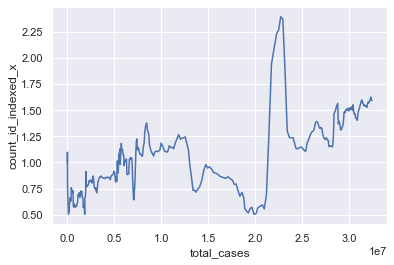

In [186]:
sns.lineplot('total_cases', 'count_id_indexed_x', data=job_cases)

/Users/minh-tampham/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_deaths', ylabel='count_id_indexed_y'>

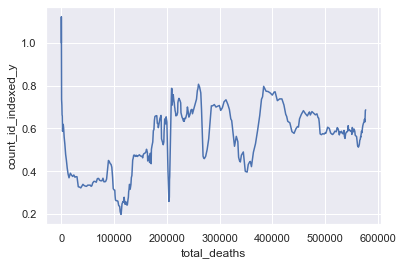

In [184]:
sns.lineplot('total_deaths', 'count_id_indexed_y', data=job_cases)

/Users/minh-tampham/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='new_deaths_smoothed'>

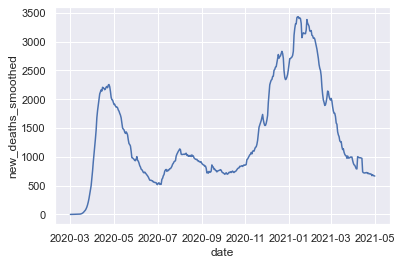

In [185]:
sns.lineplot('date', 'new_deaths_smoothed', data=job_cases)

In [79]:
sns.scatterplot(data=result2, x='count_id_indexed', y='new_cases')

<AxesSubplot:xlabel='count_id_indexed', ylabel='new_cases'>